20F-1106_L13

Task 1(Part a)

In [3]:
import csv
import random
import math

# Load data from CSV file
def get_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # skip header
        for row in reader:
            data.append([int(row[2]), int(row[3]), int(row[4])])  # age, annual_income, spending_score
    return data

# Calculate distance between two points
def calc_distance(point1, point2):
    squared_diffs = [(x - y) ** 2 for x, y in zip(point1, point2)]
    return math.sqrt(sum(squared_diffs))

# Initialize cluster centers randomly
def init_centers(data, num_clusters):
    return random.sample(data, num_clusters)

# Assign data points to nearest cluster center
def assign_clusters(data, centers):
    clusters = []
    for point in data:
        distances = [calc_distance(point, center) for center in centers]
        nearest_cluster = distances.index(min(distances))
        clusters.append(nearest_cluster)
    return clusters

# Update cluster centers based on assigned data points
def update_centers(data, clusters, num_clusters):
    new_centers = []
    for i in range(num_clusters):
        cluster_points = [point for point, cluster in zip(data, clusters) if cluster == i]
        if cluster_points:
            new_center = [sum(coords) / len(cluster_points) for coords in zip(*cluster_points)]
            new_centers.append(new_center)
        else:
            new_centers.append(random.choice(data))  # If cluster is empty, choose random data point
    return new_centers

# K-Means clustering algorithm
def kmeans_clustering(data, num_clusters, max_iterations=100):
    centers = init_centers(data, num_clusters)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centers)
        new_centers = update_centers(data, clusters, num_clusters)
        if centers == new_centers:
            break
        centers = new_centers
    return clusters, centers

# Main function
def main():
    # Load data
    file_path = 'Mall_Customers.csv'
    data = get_data(file_path)
    # Select first 20 data points
    data = data[:20]
    # Number of clusters
    num_clusters = 3
    # Run K-Means clustering
    clusters, centers = kmeans_clustering(data, num_clusters)
    # Print cluster assignments
    for i in range(num_clusters):
        print(f"Cluster {i+1}:")
        for j, point in enumerate(data):
            if clusters[j] == i:
                print(f"Data point {j+1}: {point}")
        print()

if __name__ == "__main__":
    main()

Cluster 1:
Data point 2: [21, 15, 81]
Data point 4: [23, 16, 77]
Data point 6: [22, 17, 76]
Data point 8: [23, 18, 94]
Data point 10: [30, 19, 72]
Data point 12: [35, 19, 99]
Data point 14: [24, 20, 77]
Data point 16: [22, 20, 79]
Data point 18: [20, 21, 66]
Data point 20: [35, 23, 98]

Cluster 2:
Data point 7: [35, 18, 6]
Data point 9: [64, 19, 3]
Data point 11: [67, 19, 14]
Data point 13: [58, 20, 15]
Data point 15: [37, 20, 13]
Data point 19: [52, 23, 29]

Cluster 3:
Data point 1: [19, 15, 39]
Data point 3: [20, 16, 6]
Data point 5: [31, 17, 40]
Data point 17: [35, 21, 35]



Task 1(part b)

In [ ]:
#!pip install pandas

In [ ]:
#!pip install numpy

In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install matplotib

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

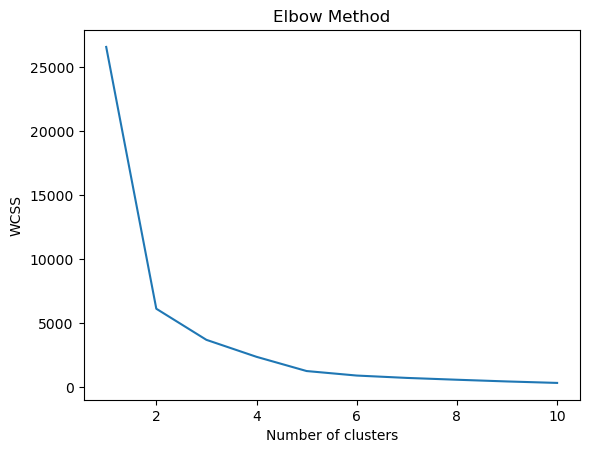

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


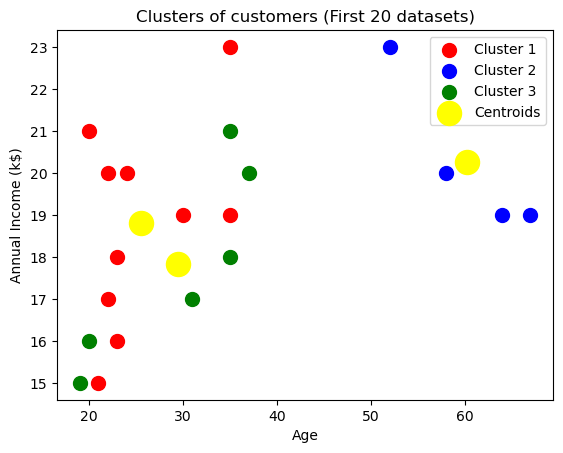

In [15]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

# Using the elbow method to find the optimal number of clusters
X = dataset.iloc[:20, [2, 3, 4]].values  # considering age, annual income, and spending score for clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers (First 20 datasets)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


Task 2(part a)

In [12]:
import csv
import random

# Load data from CSV file
dataset = []
with open('CC GENERAL.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        dataset.append([float(x) for x in row[1:13]])

# Define distance metric
def calculate_distance(point1, point2):
    return sum(abs(a - b) for a, b in zip(point1, point2))

# Define clustering function
def cluster_data(data, num_clusters, max_iterations=100):
    n = len(data)
    # Initialize medoids randomly
    medoid_indices = random.sample(range(n), num_clusters)
    medoids = [data[i] for i in medoid_indices]

    for _ in range(max_iterations):
        # Assign each data point to the nearest medoid
        clusters = []
        for point in data:
            distances = [calculate_distance(point, medoid) for medoid in medoids]
            cluster = distances.index(min(distances))
            clusters.append(cluster)
        
        # Update medoids
        for i in range(num_clusters):
            cluster_points = [data[j] for j in range(n) if clusters[j] == i]
            total_distance = [sum(calculate_distance(point, other_point) for other_point in cluster_points) for point in cluster_points]
            new_medoid_idx = total_distance.index(min(total_distance))
            medoids[i] = cluster_points[new_medoid_idx]
    
    return clusters, medoids

# Set the number of clusters
num_clusters = 5

# Perform clustering
clusters, medoids = cluster_data(dataset[:20], num_clusters)

# Print cluster assignments and medoids
print("Cluster Assignments:")
for i in range(len(clusters)):
    print(f"Data point {i}: Cluster {clusters[i]}")

print("\nMedoids:")
for i, medoid in enumerate(medoids):
    print(f"Cluster {i} Medoid: {medoid}")

Cluster Assignments:
Data point 0: Cluster 2
Data point 1: Cluster 0
Data point 2: Cluster 0
Data point 3: Cluster 4
Data point 4: Cluster 3
Data point 5: Cluster 1
Data point 6: Cluster 4
Data point 7: Cluster 1
Data point 8: Cluster 1
Data point 9: Cluster 4
Data point 10: Cluster 1
Data point 11: Cluster 4
Data point 12: Cluster 4
Data point 13: Cluster 1
Data point 14: Cluster 0
Data point 15: Cluster 1
Data point 16: Cluster 0
Data point 17: Cluster 2
Data point 18: Cluster 1
Data point 19: Cluster 0

Medoids:
Cluster 0 Medoid: [2772.772734, 1.0, 0.0, 0.0, 0.0, 346.81139, 0.0, 0.0, 0.0, 0.083333, 1.0, 0.0]
Cluster 1 Medoid: [1293.124939, 1.0, 920.12, 0.0, 920.12, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 12.0]
Cluster 2 Medoid: [40.900749, 0.818182, 95.4, 0.0, 95.4, 0.0, 0.166667, 0.0, 0.083333, 0.0, 0.0, 2.0]
Cluster 3 Medoid: [817.714335, 1.0, 16.0, 16.0, 0.0, 0.0, 0.083333, 0.083333, 0.0, 0.0, 0.0, 1.0]
Cluster 4 Medoid: [630.794744, 0.818182, 1492.18, 1492.18, 0.0, 0.0, 0.25, 0.25, 0.0, 0

Task 2(Part b)

In [ ]:
#!pip install pandas

In [ ]:
#!pip install numpy

In [ ]:
#!pip install scikit-learn

In [ ]:
#!pip install scikit-learn-extra

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install matplotib

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset
data = pd.read_csv('CC GENERAL.csv')

# Drop irrelevant columns like customer ID
data = data.drop(columns=['CUST_ID'])

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Using the elbow method to find the optimal number of clusters
distortions = []
K = range(1, 11)
for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data)
    distortions.append(kmedoids.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Find the Optimal Number of Clusters')
plt.show()

# Fitting K-Medoid to the dataset with the optimal number of clusters
optimal_k = 5  # Choose the optimal number of clusters based on the elbow method
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(data)

# Adding cluster labels to the original dataset
data['Cluster'] = kmedoids.labels_

# Visualizing the clusters
sns.pairplot(data=data, hue='Cluster', diag_kind='kde')
plt.show()
